# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
Dealerships that sell used cars want to ensure they have a profit-friendly inventory that is desirable to the market by way of strong sales, allowing 
the dealership to capture value in revenues from used cars sold.

In [ ]:
Through the used car dataset, our goal is to determine which attributes or features in the dataset affect the price of a used car.  Can we predict
which factors cause the price to be lower or higher?

In [ ]:
By solving this problem, we can provide useful recommendations about which attributes impact the used car prices so that the dealership can make an 
informed decision about which used cars could perform better in their sales, enabling them to be more profitable.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
These are the following steps that I completed when reviewing the initial dataset:

In [ ]:
I made the assumption/hyothesis that certain features/columns would be prioritized over other features when consumers consider buying used cars and
how important those features are when determining the price.  I performed a series of data sorts and filtering to review the quality of the data. If the
higher prioritized columns contained values that would not contribute in a meaningful way or obscure the results/recommendations then I made the
decision to remove those records from the dataset.  A more detailed explanation is provided in the Data Preparation section.

In [ ]:
I hypothesized that the following 5 columns (features) were more important and should be prioritized over the others when deciding which rows of data to
keep:
price
year
condition
odometer
title_status

In [ ]:
For price determination, I assume Year, Condition, and Odometer are the columns to use to build and train the model as a first step approach.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
After analyzing the data, I removed several records/rows to clean up the dataset.

In [ ]:
For example, in the Price column, I removed all records having a price less than $5K.  Several records contained price values that were not realistic in
the real world so I made the assumption that it was more realistic to have a price point at $5K or above given the value of my current vehicle.
A total of 95,352 rows were removed.

In [ ]:
For the Year column, it didn't make sense to keep records containing a value older than 2000 given that we are in the year 2024.  I am being generous
in keeping used cars up to 24 years old but I tried to maintain as much data as possible to support a healthy model performance.
A total of 15,904 rows were removed.

In [ ]:
For the Condition column, records containing "salvage" as a value were removed since most buyers would not want to purchase a car having a salvaged
condition and most dealerships would not be interested in trying to sell a salvaged car.  I kept the records having "Blank" as a value since the car
is not explicitly being labeled as "salvage".
A total of 120 rows were removed.

In [ ]:
For the Odometer column, I hypothesized that most buyers and sellers would not want a used car having more than 100K miles so those records were removed.
If the used car was well maintained, the life of the vehicle could extend another 100K miles depending on the year, make, and model.
A total of 115,161 rows were removed.

In [ ]:
For the Title_status column, all records containing values of "lien", "parts only, or "salvage" were removed assuming that most buyers and sellers
prefer titles that do not have lien or salvage issues.  Parts only titles are not relevant in helping to solve this problem.
A total of 2,466 rows were removed.

In [ ]:
Lastly I removed any remaining rows where the value was "Blank" in the year, condition, and odometer columns since these are being used in the model
to determine price, NaN will cause problems so I removed those rows to have a clean set of data to train with.

In [ ]:
A total of 123,572 records remained in the dataset.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [67]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [41]:
vehicles = pd.read_csv('C://vehicles2.csv')

In [42]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123572 entries, 0 to 123571
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123572 non-null  int64 
 1   region        123572 non-null  object
 2   price         123572 non-null  int64 
 3   year          123572 non-null  int64 
 4   manufacturer  119739 non-null  object
 5   model         123242 non-null  object
 6   condition     123572 non-null  object
 7   cylinders     73766 non-null   object
 8   fuel          123558 non-null  object
 9   odometer      123572 non-null  int64 
 10  title_status  121245 non-null  object
 11  transmission  123553 non-null  object
 12  VIN           98597 non-null   object
 13  drive         85425 non-null   object
 14  size          27719 non-null   object
 15  type          114353 non-null  object
 16  paint_color   98101 non-null   object
 17  state         123572 non-null  object
dtypes: int64(4), object(14)


In [ ]:
#Regression 1 - Using Year, Condition, and Odometer as parameters to determine the Price of a used car

In [43]:
#create numeric values from condition column
four_features = ['price', 'year', 'odometer', 'condition']
four_feature_data = pd.DataFrame(vehicles[four_features])
four_feature_data.iloc[[10100, 800, 12129, 123500], :]

price  year  odometer  condition
10100   14590  2009     75662       good
800     24460  2017     44003  excellent
12129   14590  2012     80465       good
123500   8800  2008     97530       good

In [44]:
#create dummies that represent the values in the condition column
dummies = pd.get_dummies(four_feature_data['condition'])
dummies.iloc[[10100, 800, 12129, 123500], :]

excellent   fair   good  like new    new
10100       False  False   True     False  False
800          True  False  False     False  False
12129       False  False   True     False  False
123500      False  False   True     False  False

In [45]:
#concatenate the dummies table with four feature data
data_w_dummies = pd.concat([four_feature_data, dummies], axis = 1)
data_w_dummies.iloc[[10100, 800, 12129, 123500], :]

price  year  odometer  condition  excellent   fair   good  like new  \
10100   14590  2009     75662       good      False  False   True     False   
800     24460  2017     44003  excellent       True  False  False     False   
12129   14590  2012     80465       good      False  False   True     False   
123500   8800  2008     97530       good      False  False   True     False   

          new  
10100   False  
800     False  
12129   False  
123500  False

In [46]:
#drop non-numeric column
del data_w_dummies["condition"]
data_w_dummies.head(5)

price  year  odometer  excellent   fair   good  like new    new
0  18997  2013     96475       True  False  False     False  False
1  51997  2017     73231       True  False  False     False  False
2  28997  2016     93407       True  False  False     False  False
3  11750  2013     55000      False  False   True     False  False
4   7000  2010     79000      False  False   True     False  False

In [47]:
features = vehicles[["year", "condition", "odometer"]]
price = vehicles["price"]
f = LinearRegression(fit_intercept = False)
f.fit(data_w_dummies, price)


LinearRegression(fit_intercept=False)

In [48]:
f.coef_

array([ 1.00000000e+00,  1.63738095e-11,  6.57774652e-15, -3.30007284e-08,
       -3.33403668e-08, -3.32478522e-08, -3.32978368e-08, -3.31673112e-08])

In [49]:
#For some reason, the Condition values above did not become mumeric values after following steps provided in quick reference guide/videos in Module 7
#to hot code non-numeric values so I could not complete prediction nor calculate MSE but I kept these steps to show my effort when attempting to hot
#code the condition column.
f.predict([["price", "excellent"]])

C:\Users\14246\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [ ]:
#Regression 2 - Using Year to determine the Price

In [50]:
vehicles = pd.read_csv('C://vehicles2.csv')

In [51]:
#fit a model on year
features2 = vehicles[["year"]]
price = vehicles["price"]
f2 = LinearRegression(fit_intercept = False)
f2.fit(features2, price)


LinearRegression(fit_intercept=False)

In [52]:
#show coefficients
f2.coef_

array([14.14456891])

In [53]:
#predict and add prediction to the table
vehicles["prediction"] = f2.predict(features2)
vehicles

id          region  price  year manufacturer  \
0       7301583321   hudson valley  18997  2013        dodge   
1       7301583353   hudson valley  51997  2017    chevrolet   
2       7301583380   hudson valley  28997  2016       toyota   
3       7301584709        richmond  11750  2013        honda   
4       7301586610     clarksville   7000  2010         ford   
...            ...             ...    ...   ...          ...   
123567  7317089506  seattle-tacoma  25000  2016         jeep   
123568  7317089563     san antonio  34995  2020         ford   
123569  7317093271  seattle-tacoma  13800  2015     infiniti   
123570  7317093436  seattle-tacoma  12995  2011    chevrolet   
123571  7317093901  seattle-tacoma  24900  2003          NaN   

                            model  condition    cylinders    fuel  odometer  \
0                         durango  excellent          NaN     gas     96475   
1                silverado 2500hd  excellent          NaN  diesel     73231   
2                          tacoma  excellent          NaN     gas     93407   
3                        civic lx       good  4 cylinders     gas     55000   
4                          fusion       good          NaN     gas     79000   
...                           ...        ...          ...     ...       ...   
123567  wrangler unlimited sahara  excellent  6 cylinders     gas     60000   
123568                   f150 xlt   like new  6 cylinders     gas      6000   
123569                        q50  excellent  6 cylinders     gas     77000   
123570                    express  excellent  8 cylinders     gas       182   
123571            maserati spyder   like new  8 cylinders     gas     14300   

       title_status transmission                VIN drive       size  \
0             clean    automatic                NaN   4wd        NaN   
1             clean    automatic                NaN   4wd        NaN   
2             clean    automatic                NaN   4wd        NaN   
3             clean    automatic                NaN   fwd        NaN   
4             clean    automatic                NaN   NaN        NaN   
...             ...          ...                ...   ...        ...   
123567      rebuilt    automatic  1C4BJWEG6GL287934   4wd   mid-size   
123568        clean    automatic                NaN   rwd  full-size   
123569      rebuilt    automatic                NaN   4wd   mid-size   
123570        clean    automatic  1GCWGFBA8B1168139   rwd  full-size   
123571        clean    automatic  ZAMBB18AX30009083   rwd   mid-size   

               type paint_color state    prediction  
0               SUV       black    ny  28473.017215  
1            pickup       black    ny  28529.595491  
2            pickup         NaN    ny  28515.450922  
3               NaN      silver    va  28473.017215  
4               NaN         NaN    tn  28430.583508  
...             ...         ...   ...           ...  
123567          SUV       white    wa  28515.450922  
123568        truck        grey    tx  28572.029197  
123569        sedan      silver    wa  28501.306353  
123570          van       white    wa  28444.728077  
123571  convertible       black    wa  28331.571526  

[123572 rows x 19 columns]

In [54]:
#calc MSE
mean_squared_error(vehicles["price"], f2.predict(vehicles[["year"]]))

254209363037.97012

In [55]:
#calc MAE
mean_absolute_error(vehicles["price"], f2.predict(vehicles[["year"]]))

12801.093120098469

In [ ]:
#Regression 3 - Using Odometer to determine Price

In [56]:
vehicles = pd.read_csv('C://vehicles2.csv')

In [57]:
#fit a model on odometer
features3 = vehicles[["odometer"]]
price3 = vehicles["price"]
f3 = LinearRegression(fit_intercept = False)
f3.fit(features3, price3)

LinearRegression(fit_intercept=False)

In [58]:
#show coefficients
f3.coef_

array([0.39344217])

In [59]:
#predict and add prediction to the table
vehicles["prediction"] = f3.predict(features3)
vehicles

id          region  price  year manufacturer  \
0       7301583321   hudson valley  18997  2013        dodge   
1       7301583353   hudson valley  51997  2017    chevrolet   
2       7301583380   hudson valley  28997  2016       toyota   
3       7301584709        richmond  11750  2013        honda   
4       7301586610     clarksville   7000  2010         ford   
...            ...             ...    ...   ...          ...   
123567  7317089506  seattle-tacoma  25000  2016         jeep   
123568  7317089563     san antonio  34995  2020         ford   
123569  7317093271  seattle-tacoma  13800  2015     infiniti   
123570  7317093436  seattle-tacoma  12995  2011    chevrolet   
123571  7317093901  seattle-tacoma  24900  2003          NaN   

                            model  condition    cylinders    fuel  odometer  \
0                         durango  excellent          NaN     gas     96475   
1                silverado 2500hd  excellent          NaN  diesel     73231   
2                          tacoma  excellent          NaN     gas     93407   
3                        civic lx       good  4 cylinders     gas     55000   
4                          fusion       good          NaN     gas     79000   
...                           ...        ...          ...     ...       ...   
123567  wrangler unlimited sahara  excellent  6 cylinders     gas     60000   
123568                   f150 xlt   like new  6 cylinders     gas      6000   
123569                        q50  excellent  6 cylinders     gas     77000   
123570                    express  excellent  8 cylinders     gas       182   
123571            maserati spyder   like new  8 cylinders     gas     14300   

       title_status transmission                VIN drive       size  \
0             clean    automatic                NaN   4wd        NaN   
1             clean    automatic                NaN   4wd        NaN   
2             clean    automatic                NaN   4wd        NaN   
3             clean    automatic                NaN   fwd        NaN   
4             clean    automatic                NaN   NaN        NaN   
...             ...          ...                ...   ...        ...   
123567      rebuilt    automatic  1C4BJWEG6GL287934   4wd   mid-size   
123568        clean    automatic                NaN   rwd  full-size   
123569      rebuilt    automatic                NaN   4wd   mid-size   
123570        clean    automatic  1GCWGFBA8B1168139   rwd  full-size   
123571        clean    automatic  ZAMBB18AX30009083   rwd   mid-size   

               type paint_color state    prediction  
0               SUV       black    ny  37957.332870  
1            pickup       black    ny  28812.163187  
2            pickup         NaN    ny  36750.252308  
3               NaN      silver    va  21639.319076  
4               NaN         NaN    tn  31081.931037  
...             ...         ...   ...           ...  
123567          SUV       white    wa  23606.529901  
123568        truck        grey    tx   2360.652990  
123569        sedan      silver    wa  30295.046707  
123570          van       white    wa     71.606474  
123571  convertible       black    wa   5626.222960  

[123572 rows x 19 columns]

In [60]:
#calc MSE
mean_squared_error(vehicles["price"], f3.predict(vehicles[["odometer"]]))

254591442025.63007

In [61]:
#calc MAE
mean_absolute_error(vehicles["price"], f3.predict(vehicles[["odometer"]]))

21167.075378793837

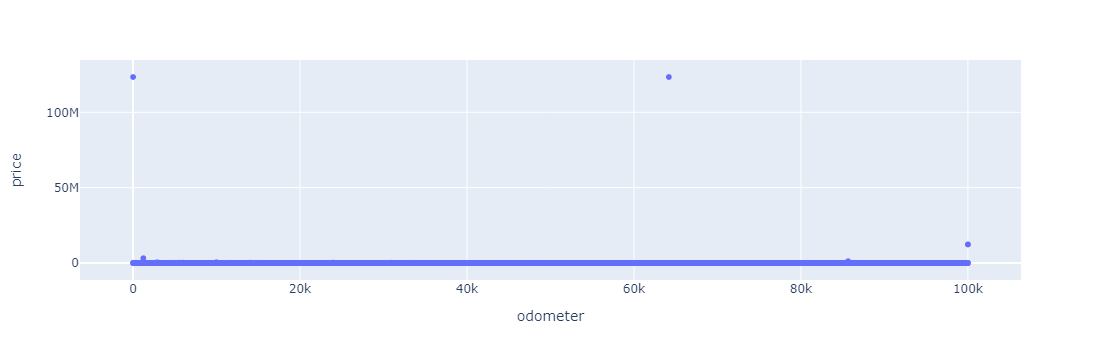

In [68]:
px.scatter(vehicles, x = "odometer", y = "price")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
My plan was to run 3 linear regression models where the first model would use multiple features to predict the price.  Based on my hypothesis, I 

In [ ]:
selected year, odometer, and condition as the multiple features to use.  However I ran into some challenges when trying to hot code the condition values

In [ ]:
into numeric values even after following the same syntax as provided in Module 7.  I decided to pivot and run 2 models using year for Regression 2 and

In [ ]:
using odometer in Regression 3.  Since the MSE for Regression 2 (254209) and Regression 3 (254591) were so close in value, I decided to compute

In [ ]:
the MAE to help optimize for a better model with a reduced level of error.  It turns out that the Year regression model performed better than the 

In [ ]:
Odometer model.  The MAE for the year model was 12801 compared to the odometer model MAE at 21167.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
We want to thank Used Cars Inc. for granting Lynch Consulting, LLC the opportunity to conduct consumer research on your behalf to enable your
organization in making informed decisions about your used car inventory.
To conduct this research, we used publicly available sources containing used car sales data from a total of 123.572 records.

After researching which factors determine the price of a used car and what consumers value when purchasing used cars, the data seems to suggests the 
following:
1. The age of the used car based on the Year is the most important factor
2. The number of miles for the used car in the Odometer reading is next important

We assumed that consumers and your organization would only consider used cars with a condition of either excellent, fair, good, or new but not salavage.
The same assumption was applied to the title status so that a salvage status would not be considered in our analysis.

Based on these findings, we recommend a used car inventory where the age of the car is no older than 24 years so that the oldest year is 2000.  Since
there is a close correlation between the number of miles on a vehicle and the age of the vehicle, we recommend an inventory having no more than 100K
miles from the odometer.

We believe these recommendations will enable Used Cars Inc. to deliver value to consumers while remaining as a profitable organization.